In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.model_selection import train_test_split
from scipy import stats

In [39]:

missing = [' ']
eurusdH4 = pd.read_csv("EuroGBP_H1.csv", na_values = missing)
eurusdH4.dropna(inplace = True) 
print(eurusdH4.shape)
mean = eurusdH4['Mean']
low = eurusdH4['Low']
high = eurusdH4['High']

(19665, 20)


In [40]:
X = eurusdH4.values[:,3:16]

In [41]:
# X[1][0]

In [42]:
# lowX_train, lowX_test, lowy_train, lowy_test = train_test_split(
#     X, low, test_size=0.1, random_state=0)

In [43]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, low)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
lowY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.000001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((low-lowY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((low-Y_bar)**2)
MSE = (sum((low - lowY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )


RSS : 53730147.41210808
MSE : 2734.21950089604
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept  -83045.1699      12.810    -6482.618    0.000
1               Open   47513.9715     472.318      100.597    0.000
2                 Ma    4253.1624  914071.676        0.005    0.996
3                Rsi      -0.5069       0.103       -4.913    0.000
4                CCI       0.0515       0.007        7.882    0.000
5                adx      -0.0009       0.041       -0.021    0.983
6               Macd   16319.7379     750.755       21.738    0.000
7                atr  -29158.9412     810.435      -35.979    0.000
8            Chaiken       0.0000       0.000        6.827    0.000
9            HighLow      -0.0003       0.000       -9.845    0.000
10          Aligator    4253.1641  914069.529        0.005    0.996
11                AC   11426.4632     518.612       22.033    0.000
12                AD       0.0000       0.000        1.564    0.118
1

In [44]:
lowData = []
lowData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
lowData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
lowData['Actual Low'] = low
lowData['Predicted Low'] = lowY_hat
lowData.to_csv('low data prediction.csv',index=False)

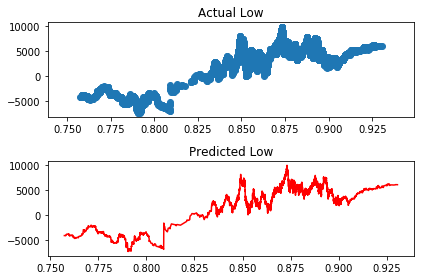

In [45]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,low)
ax1.set_title('Actual Low')
ax2.plot(np.sort(XX) ,lowY_hat ,color='red');
ax2.set_title('Predicted Low')

plt.tight_layout()
# plt.show()

In [46]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, high)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
highY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.000001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((high-highY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((high - Y_bar)**2)
MSE = (sum((high - highY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 75577905.11105281
MSE : 3846.0080968425427
   Coefficient Names  Coefficient   Std. Error  t-statistic  P-value
0          Intercept  -82985.8075       15.195    -5461.457    0.000
1               Open   44198.7900      560.173       78.902    0.000
2                 Ma   -5741.4173  1083414.038       -0.005    0.996
3                Rsi       0.9786        0.122        7.997    0.000
4                CCI      -0.0951        0.008      -12.274    0.000
5                adx      -0.0020        0.048       -0.042    0.966
6               Macd  -20338.9382      890.394      -22.843    0.000
7                atr   30027.8546      961.162       31.241    0.000
8            Chaiken      -0.0000        0.000       -6.420    0.000
9            HighLow       0.0000        0.000        0.485    0.627
10          Aligator   -5741.4195  1083412.658       -0.005    0.996
11                AC   -7751.6930      615.017      -12.604    0.000
12                AD      -0.0000        0.000       -

In [47]:
highData = []
highData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
highData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
highData['Actual High'] = high
highData['Predicted High'] = highY_hat
highData.to_csv('High data prediction.csv',index=False)

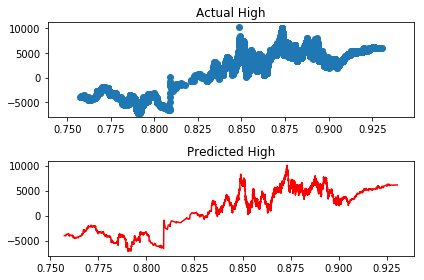

In [48]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,high)
ax1.set_title('Actual High')
ax2.plot(np.sort(XX) ,highY_hat ,color='red');
ax2.set_title('Predicted High')

plt.tight_layout()
plt.show()

In [49]:
# meanX_train, meanX_test, meany_train, meany_test = train_test_split(
#     X, mean, test_size=0.1, random_state=0)

In [50]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:16]]


# X=X._values
# y=y._values

LRmodel.fit(X, mean)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
meanY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.00001*np.random.rand(len(newX['Constant']), 14)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((mean-meanY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((mean-Y_bar)**2)
MSE = (sum((mean - meanY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 14820372.935880873
MSE : 754.1790715933475
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept  -83015.4887       6.728   -12338.585    0.000
1               Open   45856.3807     248.056      184.863    0.000
2                 Ma    -744.1274   48158.854       -0.015    0.988
3                Rsi       0.2358       0.054        4.352    0.000
4                CCI      -0.0218       0.003       -6.355    0.000
5                adx      -0.0015       0.021       -0.068    0.946
6               Macd   -2009.6002     394.294       -5.097    0.000
7                atr     434.4567     425.677        1.021    0.307
8            Chaiken      -0.0000       0.000       -0.750    0.453
9            HighLow      -0.0001       0.000       -8.825    0.000
10          Aligator    -744.1277   48159.962       -0.015    0.988
11                AC    1837.3851     272.354        6.746    0.000
12                AD      -0.0000       0.000       -0.874    0.382

In [51]:
meanData = []
meanData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
meanData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
meanData['Actual Mean'] = mean
meanData['Predicted Mean'] = meanY_hat
meanData.to_csv('Mean data prediction.csv',index=False)

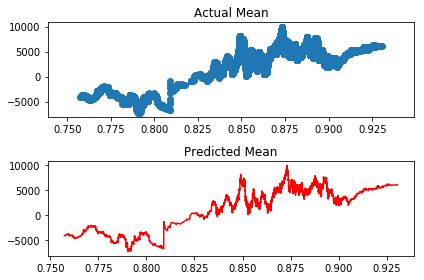

In [52]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,mean)
ax1.set_title('Actual Mean')
ax2.plot(np.sort(XX) ,meanY_hat ,color='red');
ax2.set_title('Predicted Mean')

plt.tight_layout()
plt.show()

In [53]:

print(len(meanY_hat), len(low))

gg = np.sum(meanY_hat >= low)
print(gg)

19665 19665
19662


In [54]:
gg1 = np.sum(meanY_hat <= high)
print(gg1)


19657


In [55]:
gg1 = np.sum(highY_hat <= low)
print(gg1)

2


In [56]:
gg1 = np.sum(lowY_hat >= high)
print(gg1)

2


In [57]:
highg = np.sum(highY_hat >=high)
print(highg)

12269


In [58]:
lowg = np.sum(lowY_hat < low)
print(lowg)

12291


In [59]:
print(meanY_hat)

[-4047.75802711 -4049.20493752 -4082.09844776 ...  6101.49457501
  6100.68417767  6084.64769218]


In [60]:
666-18


648

In [37]:
18294/19666

0.9302349232177362

In [93]:
19666-1372

18294